In [32]:
import matplotlib
import matplotlib.pyplot as pl
import matplotlib.colors as colors
import numpy as np
import scipy as sc
import scipy.odr as odr
import scipy.optimize as op

# Scipy ODR

[ 1.6075829   4.54323396  7.85465908  8.09124408 12.13405884 13.02663831]
[0.14596473 0.4437183  0.27703065 0.10259549 0.01181315 0.3893667 ]


[ 2.82153879  2.52940996  4.97062534 10.8404235  12.84649526 12.15580296]
[1.1985452  1.58669273 1.3131674  0.34884531 0.69010831 0.62601314]
--- 0.0008111000061035156 seconds ---
[1.04159366 2.68186539]
[1.59941373 0.51712877]
--- 0.0005998611450195312 seconds ---
[4.11103733 1.96637435]
[2.0225457 0.5846011]


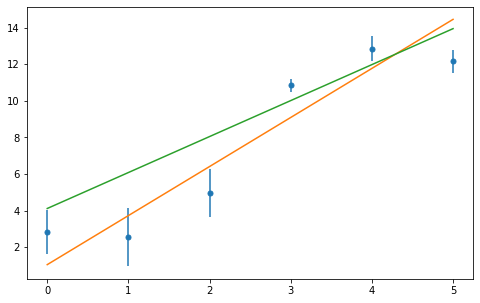

In [154]:
#define fit function
def lin(x,*p):
    return p[0]+p[1]*x

#create fake data with y errors only
x=np.array([0,1,2,3,4,5])
y=x*2+5*np.random.rand(6)
print(y)
y_err=2-2*np.random.rand(6)
print(y_err)


#fit with odr
def lin_odr(p,x):
    return lin(x,*p)
import time
start_time = time.time()
func=sc.odr.Model(lin_odr)
#need to take very small error, taking x error as zero doesn't work
mydata=sc.odr.RealData(x,y, sy=y_err)
myodr=sc.odr.ODR(mydata, func, beta0=[2,2])
myoutput=myodr.run()
print("--- %s seconds ---" % (time.time() - start_time))
print(myoutput.beta)
print(myoutput.sd_beta)

pl.figure(figsize=(8,5))
pl.errorbar(x,y,yerr=y_err, marker='.',markersize=10, linestyle='')
x_f, y_f = np.linspace(0,5,1000), lin(np.linspace(0,5,1000),*myoutput.beta)
pl.plot(x_f, y_f)
start_time = time.time()
popt, pconv=op.curve_fit(lin, x, y,p0=[1,1], sigma=y_errpy,maxfev=10**6)
print("--- %s seconds ---" % (time.time() - start_time))
print(popt)
print(np.sqrt(pconv.diagonal()))

x_f, y_f = np.linspace(0,5,1000), lin(np.linspace(0,5,1000),*popt)
pl.plot(x_f, y_f)


In [147]:
import time
start_time = time.time()
#fit with odr
func=sc.odr.Model(lin)
#need to take very small error, taking x error as zero doesn't work
mydata=sc.odr.RealData(x,y,sx=np.repeat(10**-100,6), sy=y_err)
myodr=sc.odr.ODR(mydata, func, beta0=[1,1])
myoutput=myodr.run()
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
popt, pconv=op.curve_fit(lin2, x, y, sigma=y_err, maxfev=10**6)
print("--- %s seconds ---" % (time.time() - start_time))

IndexError: tuple index out of range

# Preliminary conclusion 

ODR is actually slightly faster than curve_fit. Therefore it might be the easiest way to use the ODR fit method with a single fit function.

If no error on x is present, one simply assumes a very small x error. It remains to be seen how stable ODR works with sums of gaussians.